# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> This data set contains information about 10,000 movies collected from The Movie Database, which I will use, it is including budget and revenue and other interesting columns.


### Question(s) for Analysis
### 1- Average run time for all movies
### 2- Movies have longest and shortest runtime
### 3- Movies with highest and lowest budget
### 4- Movies that have high and low profit
### 5- Which year that we have more revenue over years

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from matplotlib.pyplot import xlabel
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
start = time.time()


<a id='wrangling'></a>
## Data Wrangling

> From this section I must load the dataset and start discovering the data and apply methods and technique of data wrangling


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe?
df = pd.read_csv('tmdb-movies.csv')
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


In [3]:
#1 What is the size of your dataframe?

df.shape

(10866, 21)

In [4]:
#2 print out a top few lines
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
#3 print last 5 rows
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
#4 display data set information ro understand dew things about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#5 General describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#6 check number of null values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#7 number of duplicated rows
df.duplicated().sum()

1

In [10]:
# print the duplicated
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
>### 1-Some columns are not necessary so I will remove them
>### 2-Remove duplicated rows
>### 3- Delete some rows with 0s values
>### 4-Change data type


## 1-Some columns are not necessary so I will remove them

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# list or columns will be deleted
list_del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
df = df.drop(list_del_col, axis=1)

# axis=1 to columns

In [12]:
# check new df
df.head(3)
# now I have the new df with 10 columns

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


## 2-Remove duplicated rows

In [13]:
# drop duplicated row
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10865 non-null  int64 
 1   revenue         10865 non-null  int64 
 2   original_title  10865 non-null  object
 3   cast            10789 non-null  object
 4   director        10821 non-null  object
 5   tagline         8041 non-null   object
 6   runtime         10865 non-null  int64 
 7   genres          10842 non-null  object
 8   release_date    10865 non-null  object
 9   release_year    10865 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 933.7+ KB


## 3- Delete some rows with 0s values

In [15]:
# I will use NAN from numpy to replace 0 to NAN
list_may_has_zero = ['budget', 'revenue', 'runtime']

df[list_may_has_zero] = df[list_may_has_zero].replace(0, np.NAN)

# now i will deleet them

df.dropna(subset = list_may_has_zero, inplace = True)

# check the shape after editing the dataset

df.shape

(3854, 10)

In [16]:
# check the dataset after I made changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3854 non-null   float64
 1   revenue         3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3853 non-null   object 
 5   tagline         3574 non-null   object 
 6   runtime         3854 non-null   float64
 7   genres          3854 non-null   object 
 8   release_date    3854 non-null   object 
 9   release_year    3854 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 331.2+ KB


In [17]:
df.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


## 4-Change data type

In [18]:
df['runtime'] = df['runtime'].astype('int32')
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\ifare\AppData\Local\Temp\ipykernel_16212\1036676321.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [19]:
# check the dataset after I made changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3853 non-null   object        
 5   tagline         3574 non-null   object        
 6   runtime         3854 non-null   int32         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 316.1+ KB


In [20]:
df.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Research Question 1 (Average run time for all movies)
### for this Q1, I will use some stat and methods to solve this Q1

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.sort_values(by='runtime', ascending=True, inplace=True)
df['runtime'].mean()

109.22029060716139

The Average runtime around 109 mins

In [22]:
df['runtime'].median()

106.0

The Median runtime for movies is 106 mins.

In [23]:
df['runtime'].quantile(q=[0.5, 0.7, 0.9])

0.5    106.0
0.7    116.0
0.9    134.0
Name: runtime, dtype: float64

I am using Quantile  with (50% and 70% and 90%)

In [24]:
runtime_std = df['runtime'].std()
runtime_std

19.92282002284655

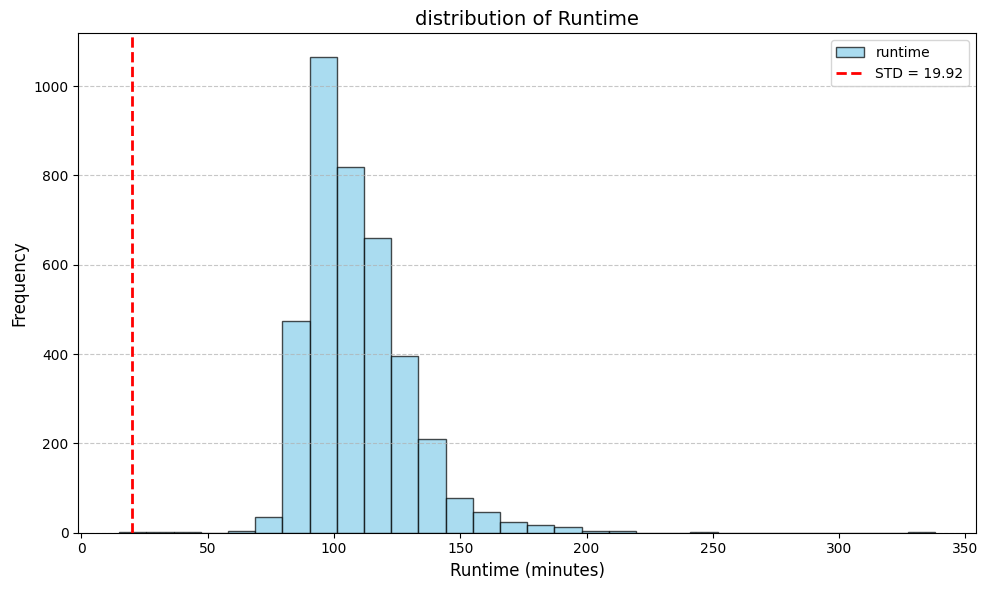

In [25]:
plt.figure(figsize=(10, 6))
df['runtime'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(runtime_std, color='red', linestyle='dashed', linewidth=2, label=f'STD = {runtime_std:.2f}')

plt.title('distribution of Runtime', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

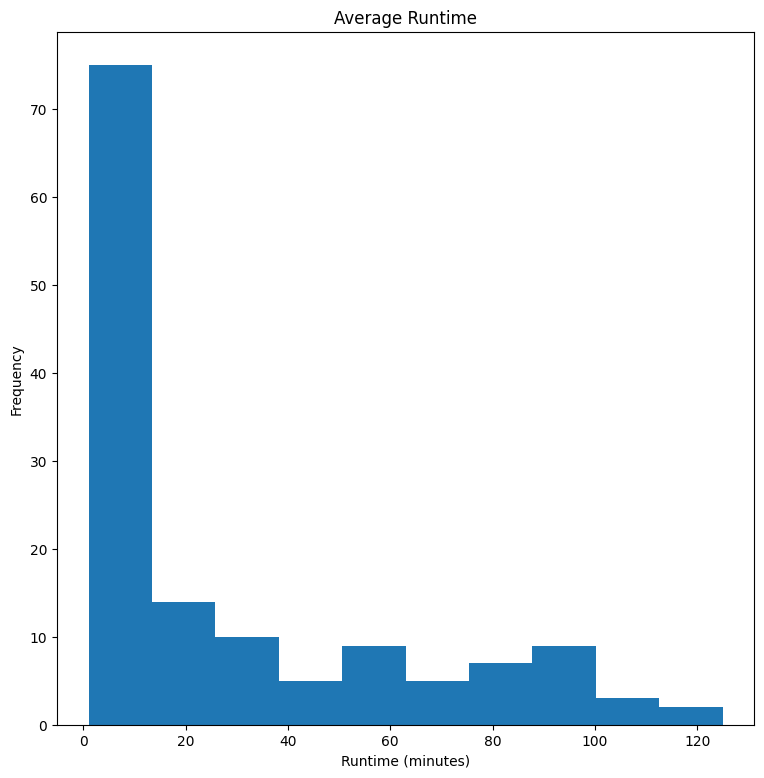

In [26]:
df['runtime'].value_counts().plot(kind='hist', figsize=(9, 9), xlabel='Runtime (minutes)', ylabel='Frequency', title='Average Runtime');

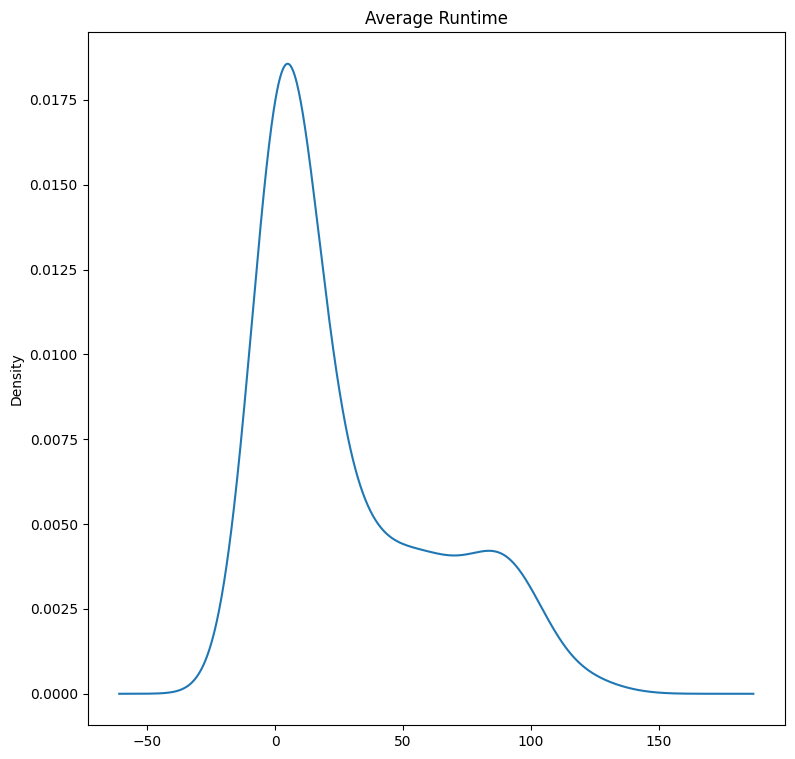

In [27]:
df['runtime'].value_counts().plot(kind='kde', figsize=(9, 9), xlabel='Runtime (minutes)', ylabel='Frequency', title='Average Runtime');

## As we see in output, the Avg mins is 109, and the median is 106 mins which they are closer.
## I used quantile to measure of spread with 50% and 70% and 90%.
## I meaured the STD and i made a plot with i can see it is low STD with around 19.92 mins.
## I made 2 plot for Avg runtime

### Research Question 2  (Movies have longest and shortest runtime)

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# function for some questions:
def val(col):
    # highest value
    high = df[col].idxmax() # idxmax --> index of the first occurrence of the maximum value
    high_details=pd.DataFrame(df.loc[high])
    # for lowest value
    low= df[col].idxmin() #  idxmax --> index of the first occurrence of the maximum value
    low_details=pd.DataFrame(df.loc[low])

    # merage them
    all = pd.concat([high_details, low_details], axis=1)
    return all
# First column for high and second for low

In [29]:
# with using above function

val('runtime')

,2107,5162
budget,18000000.0,10.0
revenue,871279.0,5.0
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


### Research Question 3  (Movies with highest and lowest budget)

In [30]:
# calling above function

val('budget')

,2244,3581
budget,425000000.0,1.0
revenue,11087569.0,1378.0
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
tagline,Assassin. Hero. Legend.,Here comes the ride.
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,2011-06-03 00:00:00
release_year,2010,2011


### Research Question 4  (Movies that have high and low profit)


In [31]:
# profit is same as revenue
val('revenue')

,1386,5067
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 5162 to 2107
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   director        3853 non-null   object        
 5   tagline         3574 non-null   object        
 6   runtime         3854 non-null   int32         
 7   genres          3854 non-null   object        
 8   release_date    3854 non-null   datetime64[ns]
 9   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 445.2+ KB


### Research Question 5  (Which year that we have more revenue over years)

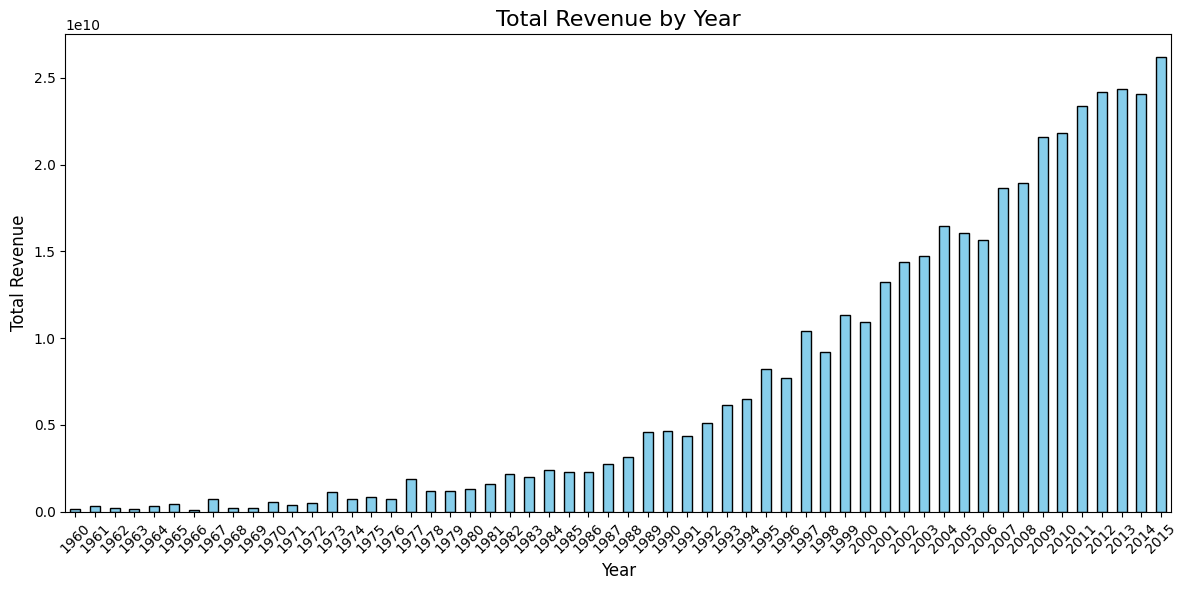

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])


# some conditions to prevent any errors
if 'release_year' not in df.columns or df['release_year'].isnull().any():
    df['release_year'] = df['release_date'].dt.year

# to total revenue
revenue_by_year = df.groupby('release_year')['revenue'].sum()

# start making the plot
plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## As I see in plot, over years the revenue is increasing and the highest revenue was in 2015

<a id='conclusions'></a>
## Conclusions 
> After all these processes, here what I can find:
> - for pre-processing it is require some changes for best practice without afecting the result directly for example columns are not necessary have been deleetd and some data type also changes for food memory and efficiency.
> - The Avg runtime is 109 min which is 1 hr and 49 mins for this infotmation I can said movies with high runtime should not be have high revenue but movies neer to Avg runtime is highly neer to high revenue which is crealy shown in Q2.
> - The results show that the data have low STD.
> - Also, I can said long rumtime is not necessary to be high revenue and low runtime is neer to be low revenue which is nor recommended.
> - High revenue is also neer to runtime movies which u recommend to keep movies runttime neer in Avg with inresas in -+10% ~ -+15% .
> - Over years the revenue is increasing maybe this is duo to multi reasons but based in the data and some info I hace is the movies become closear to people need whoch that is good.

## Submitting your Project 



In [36]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 522597 bytes to Investigate_a_Dataset.html


In [35]:
print(f'{time.time() - start:.2f} Seconds')

21.90 Seconds
